In [15]:
import matplotlib.pylab as plt
import jax.numpy as jnp
import numpy as np
from desc.grid import Grid, LinearGrid
import desc.io
from desc.plotting import plot_3d, plot_surfaces
import plotly.graph_objects as go


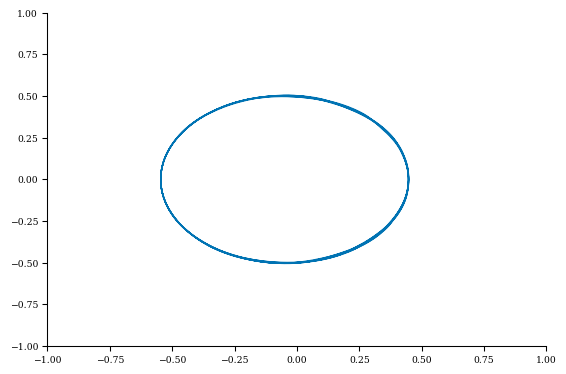

In [16]:
# Define the file name where the data is stored
file_name = f'solution_input.LandremanPaul2021.txt'

# Initialize empty lists to store the separated columns
list1 = []
list2 = []

list3 = []
list4 = []

# Open the file for reading
with open(file_name, 'r') as file:
    # Read the first line (column headers) and discard it
    file.readline()

    # Read the data row by row
    i = 0
    for line in file:
        # Split the line into columns using tab as the delimiter
        columns = line.strip().split('\t')

        # Convert each column to the appropriate data type and append to the respective lists
        list1.append(float(columns[0]))
        list2.append(float(columns[1]))
        list3.append(float(columns[2]))
        list4.append(float(columns[3]))


plt.plot(np.sqrt(list1) * np.cos(list2), np.sqrt(list1) * np.sin(list2))

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()
plt.close()


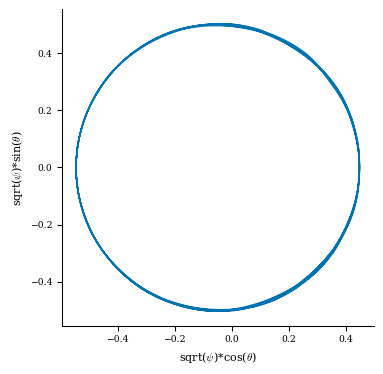

In [17]:
fig, ax = plt.subplots()

#create simple line plot

ax.plot(np.sqrt(list1) * np.cos(list2), np.sqrt(list1) * np.sin(list2))

#set aspect ratio to 1
ratio = 1.0
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect("equal", adjustable='box')

plt.xlabel(r'sqrt($\psi$)*cos($\theta$)')
plt.ylabel(r'sqrt($\psi$)*sin($\theta$)')

#plt.title(rf'E = {E_}, q/m = {q_}/{m_}, $\Delta$t = [{t_i}, {t_f}], nt = {nt_}, x$_i$ = [{psi_i:.2f}, {theta_i:.2f}, {zeta_i:.2f}], v$_\%$ = {vpar_i_ratio:.2f}')
plt.show()

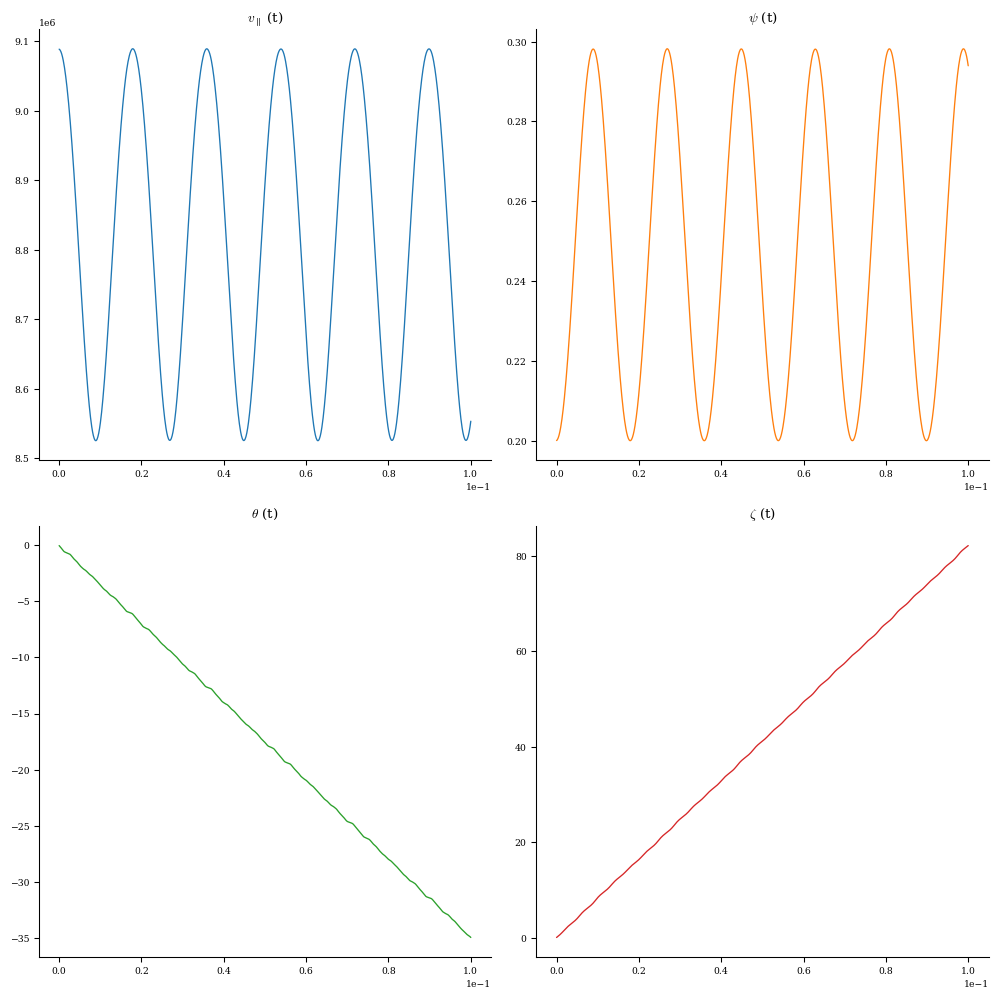

In [19]:
t = np.linspace(0, 0.1, 999)

fig, axs = plt.subplots(2, 2)
axs[0, 1].plot(t, list1, 'tab:orange')
axs[0, 1].set_title(r'$\psi$ (t)')
axs[1, 0].plot(t, list2, 'tab:green')
axs[1, 0].set_title(r'$\theta$ (t)')
axs[1, 1].plot(t, list3, 'tab:red')
axs[1, 1].set_title(r'$\zeta$ (t)')
axs[0, 0].plot(t, list4, 'tab:blue')
axs[0, 0].set_title(r"$v_{\parallel}$ (t)")

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)
axs[0, 0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[1, 0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[1, 1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axs[0, 1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [20]:
eq = desc.io.load("equilibria/input.LandremanPaul2021_QA_scaled_output.h5")[-1]
eq._iota = eq.get_profile("iota").to_powerseries(order=eq.L, sym=True)
eq._current = None


/home/joaobiu/DESC/desc/io/hdf5_io.py:125: RuntimeWarning:

Save attribute '_anisotropy' was not loaded.



In [21]:
grid = Grid(np.vstack((np.sqrt(list1), list2, list3)).T,sort=False)

data = eq.compute(["X", "Y", "Z"], grid)

In [22]:
print(data["X"])
print(data["Y"])
print(data["Z"])

[ 1.25876124e+01  1.24243280e+01  1.21564519e+01  1.17900690e+01
  1.13331130e+01  1.07948615e+01  1.01853944e+01  9.51505516e+00
  8.79397473e+00  8.03166891e+00  7.23674130e+00  6.41668703e+00
  5.57779829e+00  4.72515626e+00  3.86269335e+00  2.99331289e+00
  2.11905057e+00  1.24126844e+00  3.60870655e-01 -5.21467829e-01
 -1.40506220e+00 -2.28897466e+00 -3.17177106e+00 -4.05128750e+00
 -4.92441195e+00 -5.78689607e+00 -6.63321412e+00 -7.45648331e+00
 -8.24847286e+00 -8.99971264e+00 -9.69972390e+00 -1.03373775e+01
 -1.09013686e+01 -1.13807921e+01 -1.17657713e+01 -1.20480820e+01
 -1.22217110e+01 -1.22832756e+01 -1.22322627e+01 -1.20710525e+01
 -1.18047286e+01 -1.14407048e+01 -1.09882058e+01 -1.04576703e+01
 -9.86013342e+00 -9.20664853e+00 -8.50778662e+00 -7.77325848e+00
 -7.01161984e+00 -6.23012681e+00 -5.43466266e+00 -4.62976430e+00
 -3.81871541e+00 -3.00368759e+00 -2.18592046e+00 -1.36592373e+00
 -5.43699131e-01  2.81020518e-01  1.10853615e+00  1.93893169e+00
  2.77182749e+00  3.60612

<Figure size 576x384 with 0 Axes>

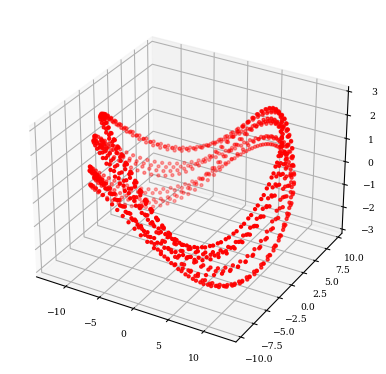

In [23]:
def plot_trajectory(data, ax=None, **kwargs):
    if ax is None:
        fig = plt.figure()
        ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(data["X"], data["Y"], data["Z"], **kwargs)
    return ax

ax = plot_trajectory(data, color="r", marker=".")

In [24]:


fig = plot_3d(eq, "B", alpha=0.5)
fig.add_trace(go.Scatter3d(x=data["X"], y=data["Y"], z=data["Z"], mode='markers'))